In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_256_256 = cv2.imread('baboon.jpg',0)

In [3]:
img_256_256.shape

(256, 256)

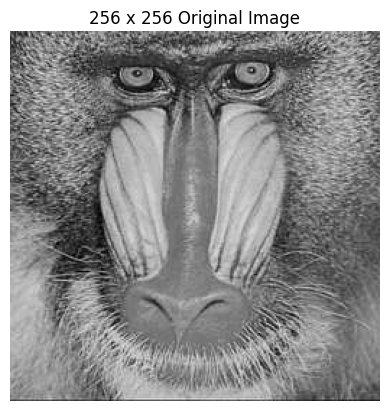

In [4]:
plt.imshow(img_256_256,cmap='gray')
plt.axis('off')
plt.title("256 x 256 Original Image")
plt.show()

In [5]:
img_panel_512_512 = np.zeros((512,512),dtype=np.uint8)
img_panel_512_512.shape

(512, 512)

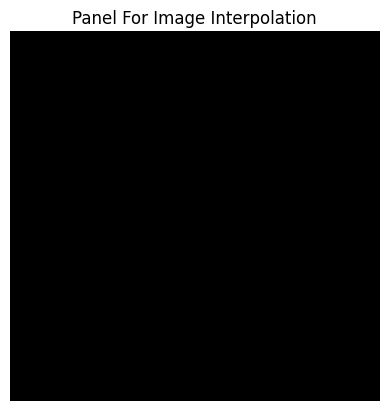

In [6]:
plt.imshow(img_panel_512_512,cmap='gray')
plt.axis('off')
plt.title('Panel For Image Interpolation')
plt.show()

In [7]:
img_panel_512_512[0:512:2,0:512:2] = img_256_256[0:256,0:256]

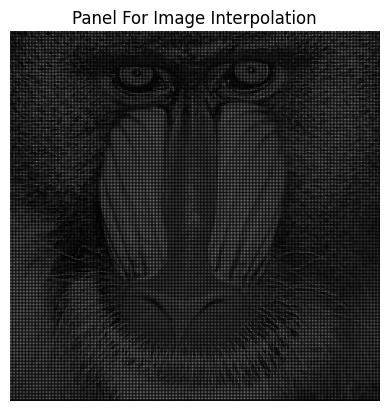

In [8]:
plt.imshow(img_panel_512_512,cmap='gray')
plt.axis('off')
plt.title('Panel For Image Interpolation')
plt.show()

<h2>Nearest Nieghbour Interpolation</h2>

In [9]:
img_panel_512_512[:, 1::2] = img_panel_512_512[:, 0::2]

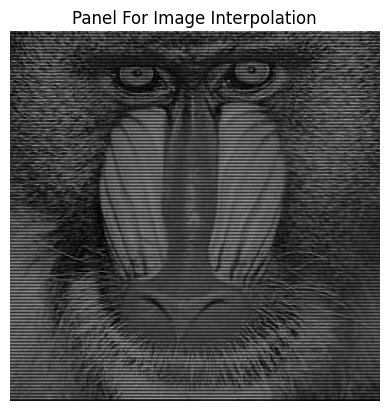

In [10]:
plt.imshow(img_panel_512_512,cmap='gray')
plt.axis('off')
plt.title('Panel For Image Interpolation')
plt.show()

In [11]:
img_panel_512_512[1::2,:] = img_panel_512_512[0::2,:]

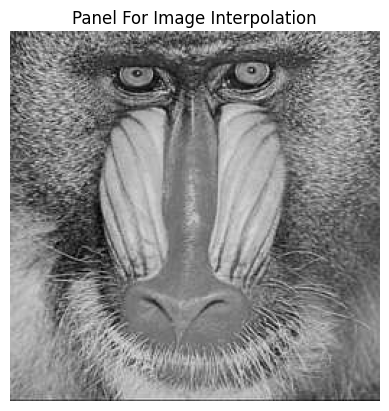

In [12]:
plt.imshow(img_panel_512_512,cmap='gray')
plt.axis('off')
plt.title('Panel For Image Interpolation')
plt.show()

In [13]:
def nearest_neighbour_interpolation(img):
    shape = img.shape[0]*2
    upscaled_image = np.zeros((shape,shape),dtype=np.uint8)
    upscaled_image[0:shape:2,0:shape:2] = img[0:img.shape[0],0:img.shape[0]]
    upscaled_image[:, 1::2] = upscaled_image[:, 0::2]
    upscaled_image[1::2,:] = upscaled_image[0::2,:]
    return upscaled_image

In [14]:
img_512 = nearest_neighbour_interpolation(img_256_256)
cv2.imshow('Image 512x512 using NN',img_512)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
img_1024 = nearest_neighbour_interpolation(img_512)
cv2.imshow('Image 1024x1024 using NN',img_1024)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h2>Bilinear Interpolation</h2>

In [16]:
def bilinear_interpolation(img):
    shape = img.shape[0]*2
    upscaled_image = np.zeros((shape,shape),dtype=float)
    upscaled_image[0:shape:2,0:shape:2] = img[0:img.shape[0],0:img.shape[0]]
    for i in range(0, shape, 2):
        for j in range(1, shape-1, 2): 
            upscaled_image[i][j] = (upscaled_image[i][j-1] + upscaled_image[i][j+1]) / 2         
    for i in range(1, shape-1, 2): 
        for j in range(0, shape, 2):
            upscaled_image[i][j] = (upscaled_image[i-1][j] + upscaled_image[i+1][j]) / 2 
    for i in range(1, shape-1, 2): 
        for j in range(1,shape-1, 2): 
            upscaled_image[i][j] = (upscaled_image[i-1][j] + upscaled_image[i+1][j]) / 2
    return np.uint8(np.clip(upscaled_image, 0, 255))       

In [17]:
bl_img_512 = bilinear_interpolation(img_256_256)

In [18]:
cv2.imshow('Image 512x512 using BLI',bl_img_512)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
bl_img_1024 = bilinear_interpolation(bl_img_512)

In [20]:
cv2.imshow('Image 1024x1024 using BLI',bl_img_1024)
cv2.waitKey(0)
cv2.destroyAllWindows()